<a href="https://colab.research.google.com/github/sabamontazeri/machine-learning-course/blob/main/HW4_AI(ANN_and_clustering).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install scikeras
!pip uninstall tensorflow
!pip install tensorflow==2.12.0
!pip install scikit-learn==1.3.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 67.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 29.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.3.3 which is incompatible.
Found existing installation: tensorflow 2.15.0
Uninstalling tensorflow-2.15.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/i

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 18.4 MB/s eta 0:00:00
ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._deter

In [138]:
##importing dataset
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
Data=pd.read_csv('/content/drive/MyDrive/heart.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Neural Network###

In [145]:
# @title Data preparation
Data.head()
import numpy as np
from sklearn.model_selection import train_test_split
Data=Data.dropna()
X=Data.drop("target",axis=1)
y=Data["target"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=42)

In [140]:
# @title Scaling data
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
X_train=Scaler.fit_transform(X_train)
X_test=Scaler.transform(X_test)

In [141]:
# @title training neural network
import keras
from keras import layers
import tensorflow as tf
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import os
import random
import numpy as np
from tensorflow.keras import initializers
##Global initializer
initializer = tf.keras.initializers.GlorotUniform(seed=10)
seed_value = 10
#1. Set `PYTHONHASHSEED` environment variable at a fixed value
os.environ['PYTHONHASHSEED'] = str(seed_value)
#2. Set `python` built-in pseudo-random generator at a fixed value
random.seed(seed_value)
#3. Set `numpy` pseudo-random generator at a fixed value
np.random.seed(seed_value)


def build_model(n_hidden=4, n_neurons=50, learning_rate=   0.005, input_shape=[15],activation_1="relu",optimizer="SGD"):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation=activation_1,kernel_initializer=initializer))
        model.add(keras.layers.Dropout(0.05))
    model.add(keras.layers.Dense(1,activation="sigmoid"))
    #optimizer = keras.optimizers.SGD(learning_rate=learning_rate,momentum=0.3)
    model.compile(loss="binary_crossentropy", optimizer=optimizer,metrics="accuracy")
    return model
model=KerasClassifier(build_model)
history=model.fit(X_train, y_train ,validation_data=(X_test,y_test),callbacks=[keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=20)],epochs=300 )


<ipython-input-141-29575271b800>:32: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model=KerasClassifier(build_model)


Epoch 1/300
8/8 [==============================] - 2s 44ms/step - loss: 0.6845 - accuracy: 0.5417 - val_loss: 0.6945 - val_accuracy: 0.4333
Epoch 2/300
8/8 [==============================] - 0s 14ms/step - loss: 0.6839 - accuracy: 0.5625 - val_loss: 0.6896 - val_accuracy: 0.4500
Epoch 3/300
8/8 [==============================] - 0s 11ms/step - loss: 0.6669 - accuracy: 0.6375 - val_loss: 0.6846 - val_accuracy: 0.5333
Epoch 4/300
8/8 [==============================] - 0s 11ms/step - loss: 0.6639 - accuracy: 0.6375 - val_loss: 0.6798 - val_accuracy: 0.6000
Epoch 5/300
8/8 [==============================] - 0s 10ms/step - loss: 0.6612 - accuracy: 0.6208 - val_loss: 0.6745 - val_accuracy: 0.6333
Epoch 6/300
8/8 [==============================] - 0s 12ms/step - loss: 0.6510 - accuracy: 0.6875 - val_loss: 0.6690 - val_accuracy: 0.6167
Epoch 7/300
8/8 [==============================] - 0s 12ms/step - loss: 0.6554 - accuracy: 0.6958 - val_loss: 0.6637 - val_accuracy: 0.6500
Epoch 8/300
8/8 [===

In [5]:
# @title Fine Tuning
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

param_distribs = {
    "n_hidden": [  2, 3,4],
    "n_neurons":[30,35,40,45,50],

}

#rnd_search_cv = RandomizedSearchCV(model, param_distribs, n_iter=10, cv=3, )
#rnd_search_cv.fit(Xtrain, ytrain, epochs=100)
gs=GridSearchCV(estimator=model, param_grid=param_distribs, cv=10)
# now fit the dataset to the GridSearchCV object.
gs = gs.fit(X_train, y_train)

7/7 [==============================] - 1s 12ms/step - loss: 0.8067 - accuracy: 0.3843


7/7 [==============================] - 2s 10ms/step - loss: 0.7580 - accuracy: 0.3472


8/8 [==============================] - 1s 4ms/step - loss: 0.7017 - accuracy: 0.4458


In [7]:
# @title Summary and best params
print(gs.best_params_)
model.model.summary()

{'n_hidden': 4, 'n_neurons': 50}
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                800       
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense_3 (Dense)       

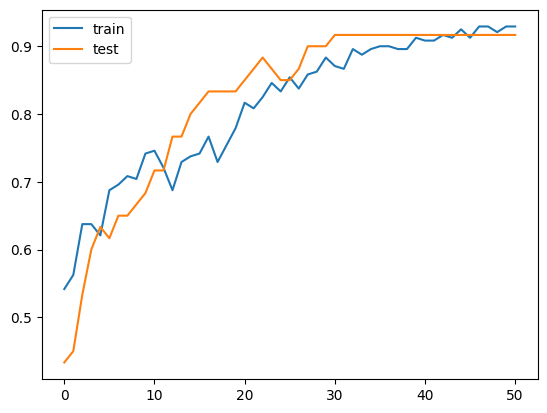

In [142]:
# @title earlystopping plot
import matplotlib.pyplot as plt
# plot training history
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()
es = keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='min', verbose=1)

In [144]:
##calculating predicted values
from sklearn.metrics import accuracy_score
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)
y_pred_train=y_pred_train.reshape(-1,1)
y_pred_test=y_pred_test.reshape(-1,1)
## calculating accuracy score
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred_test))

2/2 [==============================] - 0s 6ms/step
0.9416666666666667
0.9166666666666666


### Agglomerative Ckustering###

In [105]:
# @title Data preprocessing
X_clustering=X
##Scaling data
X_clustering=Scaler.fit_transform(X_clustering)
## delete datas with high variance
for  variable in Data_clustering.columns:
  print(variable,len(Data_clustering[variable].unique()))
X_clustering = pd.DataFrame(X_clustering,columns=X.columns)
X_clustering.drop(['cl','aq','chol'],axis=1)


age 41
sex 2
cl 303
cp 4
trestbps 49
chol 152
fbs 3
restecg 3
aq 303
thalach 92
exang 3
oldpeak 40
slope 3
ca 5
thal 4
target 2


,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.950544,0.675508,1.982234,0.755174,2.380476,-1.001483,0.012807,-0.691254,1.089384,-2.274546,-0.710750,-2.142365
1,-1.912097,0.675508,1.007365,-0.102112,-0.420084,0.924445,1.628286,-0.691254,2.121433,-2.274546,-0.710750,-0.506972
2,-1.471691,-1.480368,0.032496,-0.102112,-0.420084,-1.001483,0.973362,-0.691254,0.315348,0.967087,-0.710750,-0.506972
3,0.179833,0.675508,0.032496,-0.673636,-0.420084,0.924445,1.235331,-0.691254,-0.200676,0.967087,-0.710750,-0.506972
4,0.289934,-1.480368,-0.942373,-0.673636,-0.420084,0.924445,0.580408,1.446646,-0.372684,0.967087,-0.710750,-0.506972
...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.510137,0.675508,-0.942373,1.841069,2.380476,-1.001483,-2.606887,-0.691254,-0.028668,-0.653729,1.245443,-2.142365
296,0.289934,-1.480368,-0.942373,0.469412,-0.420084,0.924445,-1.166055,1.446646,-0.716700,-0.653729,-0.710750,1.128422
297,1.501051,0.675508,-0.942373,0.698021,2.380476,0.924445,-0.380147,-0.691254,2.035429,-0.653729,1.245443,1.128422
298,0.289934,0.675508,-0.942373,-0.102112,-0.420084,0.924445,-1.515348,1.446646,0.143340,-0.653729,0.267346,1.128422


In [106]:
# @title Reduction of dimensions
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_clustering)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

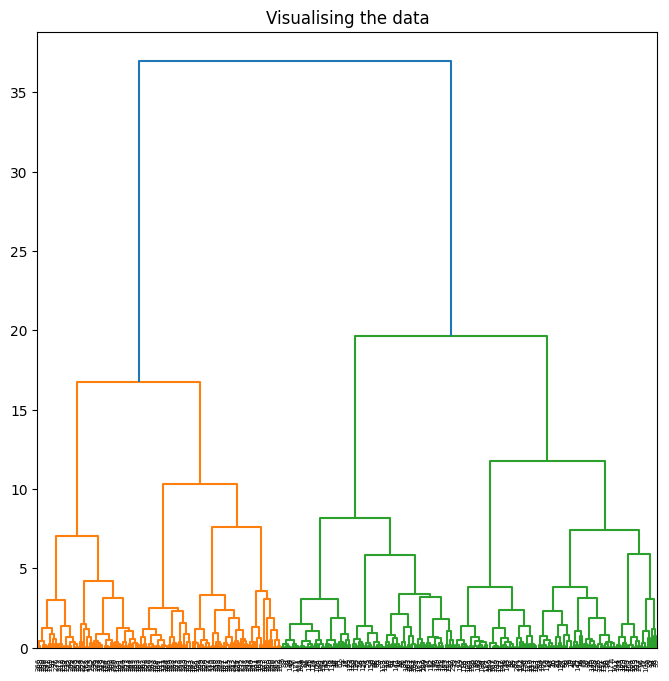

In [107]:
# @title Shc diagram for calculating best k cluster number
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))

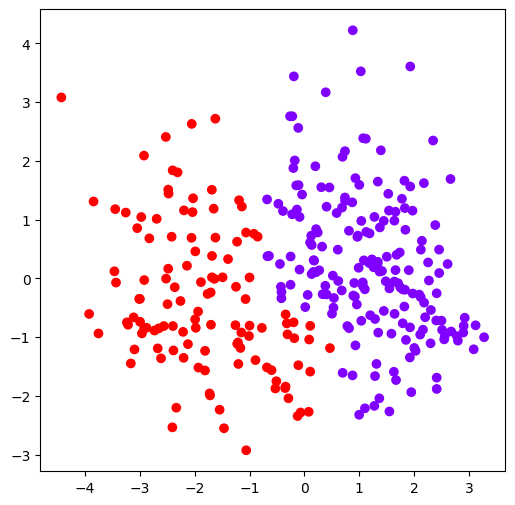

In [132]:
# @title scatter plot of agglomerative clusters
ac2 = AgglomerativeClustering(n_clusters = 2)
ac3 = AgglomerativeClustering(n_clusters = 3)
ac4 = AgglomerativeClustering(n_clusters = 4)
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
           c = ac2.fit_predict(X_principal), cmap ='rainbow')
plt.show()

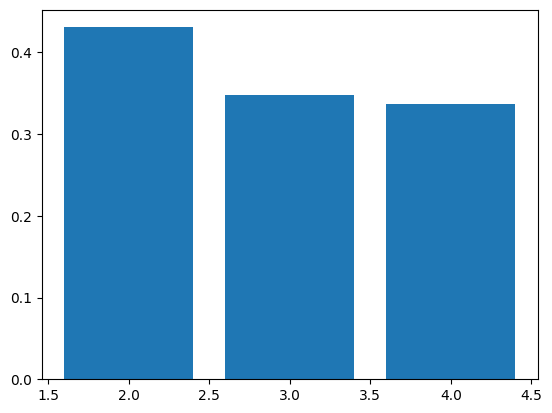

In [134]:

from sklearn.metrics import silhouette_score
k=[2,3,4]
silhouette_scores=[]
silhouette_scores.append(
        silhouette_score(X_principal, ac2.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac3.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac4.fit_predict(X_principal)))
plt.bar(k, silhouette_scores)
plt.show()
### based on siilhouette bar we decide k=2 is the best choice

###Elbow method###

In [109]:
# @title Saving errors of kmeans for ploting elbow
from sklearn.cluster import KMeans
error = []
for n_clusters in range(1, 21):
    model = KMeans(init='k-means++',
                   n_clusters=n_clusters,
                   max_iter=500,
                   random_state=24)
    model.fit(X_clustering)
    error.append(model.inertia_)

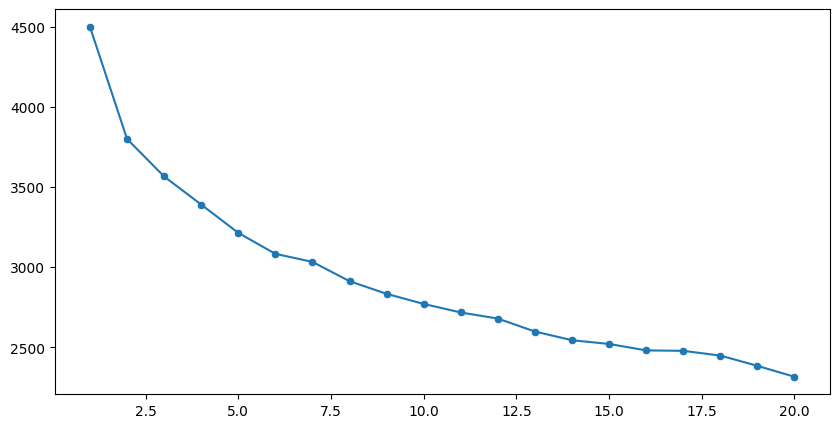

In [110]:
# @title ploting elbow
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.lineplot(x=range(1, 21), y=error)
sns.scatterplot(x=range(1, 21), y=error)
plt.show()

In [112]:
# create clustering model with optimal k=5
model = KMeans(init='k-means++',
               n_clusters=2,
               max_iter=500,
               random_state=22)
segments = model.fit_predict(X_clustering)


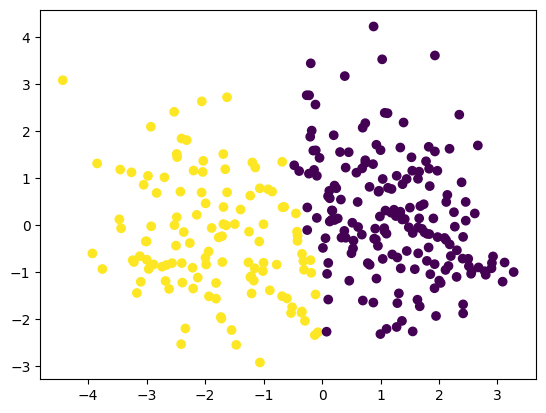

In [125]:
# @title scatter plot of elbow method
plt.scatter(X_principal['P1'],X_principal['P2'],c=model.labels_)